In [1]:
train_dataset = 'train.csv'
test_dataset = 'test.csv'

In [2]:
import pandas as pd

In [3]:
import pandas as pd
train_data = pd.read_csv(train_dataset, encoding='ISO-8859-1')
test_data = pd.read_csv(test_dataset,encoding="ISO-8859-1")
data = pd.concat([train_data,test_data])

In [4]:
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
final_corpus = data['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = data["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


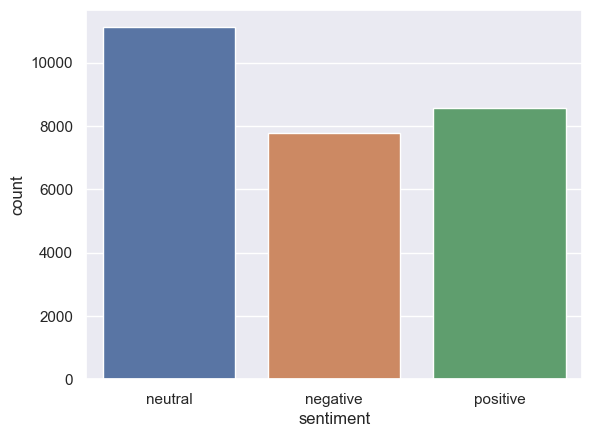

In [8]:
#total sentiment countplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.countplot(x='sentiment', data=data_eda)
plt.show()

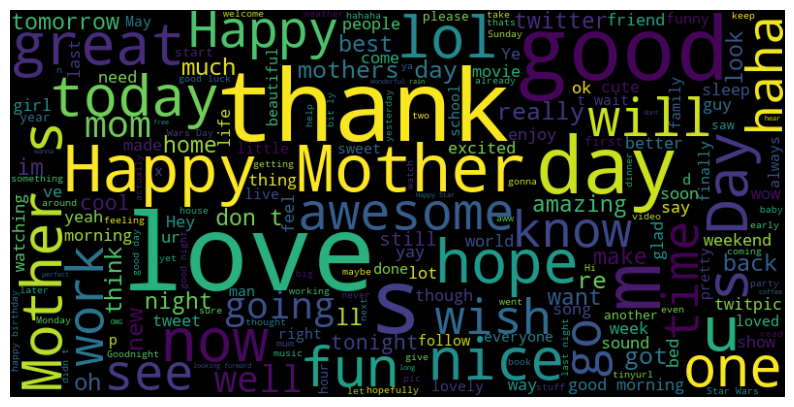

In [9]:
#worcloud of positive sentiment
from wordcloud import WordCloud
positive = data_eda[data_eda['sentiment'] == 'positive']
all_text = ' '.join(word for word in positive.text)

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

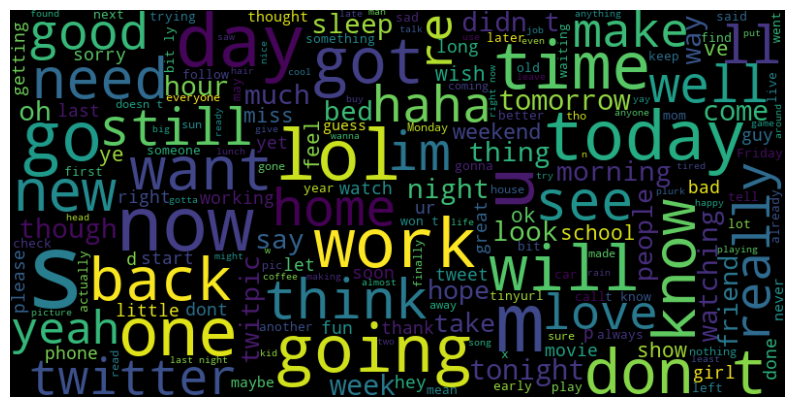

In [10]:
#worcloud of positive sentiment
from wordcloud import WordCloud
positive = data_eda[data_eda['sentiment'] == 'neutral']
all_text = ' '.join(word for word in positive.text)

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

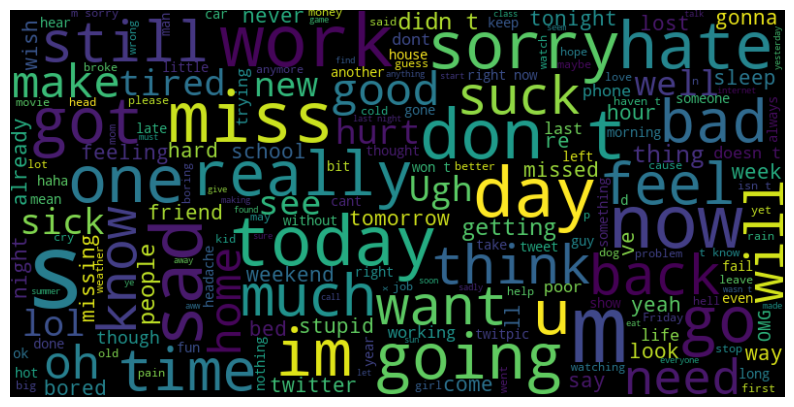

In [11]:
#wordcloud of negative sentiment
negative = data_eda[data_eda['sentiment'] == 'negative']

all_text = ' '.join(word for word in negative.text)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [40]:
import string
import re
def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
data_eda['text'] = data_eda["text"].apply(wp)

In [41]:
data_eda

,text,sentiment
0,Id have responded if I were going,neutral
1,Sooo SAD I will miss you here in San Diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,Sons of why couldnt they put them on the rel...,negative
...,...,...
27475,wish we could come see u on Denver husband l...,negative
27476,Ive wondered about rake to The client has ma...,negative
27477,Yay good for both of you Enjoy the break you...,positive
27478,But it was worth it,positive


In [42]:
data_eda.to_csv("data_eda.csv", index=False)

In [43]:
data_eda['sentiment_code'] = data_eda['sentiment'].astype('category').cat.codes

## Feature Extraction

In [44]:
X=data_eda['text']
y= data_eda['sentiment_code']

## Word To Token

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

In [46]:
tokenizer.fit_on_texts(X)

In [47]:
input_sequences = []
for sentence in X:
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]
    input_sequences.append(tokenized_sentence)

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LENGTH = max([len(x) for x in input_sequences])
print(MAX_LENGTH)

32


In [49]:
enocoder_input = pad_sequences(input_sequences, maxlen=MAX_LENGTH, padding='pre')

# Model Building

In [50]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

In [51]:
input = Input(shape=(MAX_LENGTH,))
x = Embedding(len(tokenizer.word_index)+1, 10)(input)
x = LSTM(64)(x)
output = Dense(3, activation='softmax')(x)

model = Model(input, output)

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 32, 10)            265370    
                                                                 
 lstm_1 (LSTM)               (None, 64)                19200     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 284765 (1.09 MB)
Trainable params: 284765 (1.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training

In [54]:
history = model.fit(enocoder_input, y, epochs=15)

Epoch 1/15
859/859 [==============================] - 10s 9ms/step - loss: 0.8418 - accuracy: 0.6082
Epoch 2/15
859/859 [==============================] - 9s 11ms/step - loss: 0.5850 - accuracy: 0.7623
Epoch 3/15
859/859 [==============================] - 9s 11ms/step - loss: 0.4458 - accuracy: 0.8298
Epoch 4/15
859/859 [==============================] - 9s 10ms/step - loss: 0.3464 - accuracy: 0.8746
Epoch 5/15
859/859 [==============================] - 9s 10ms/step - loss: 0.2816 - accuracy: 0.9017
Epoch 6/15
859/859 [==============================] - 9s 10ms/step - loss: 0.2422 - accuracy: 0.9167
Epoch 7/15
859/859 [==============================] - 9s 11ms/step - loss: 0.2110 - accuracy: 0.9287
Epoch 8/15
859/859 [==============================] - 9s 11ms/step - loss: 0.1896 - accuracy: 0.9364
Epoch 9/15
859/859 [==============================] - 9s 10ms/step - loss: 0.1686 - accuracy: 0.9431
Epoch 10/15
859/859 [==============================] - 9s 11ms/step - loss: 0.1511 - accura

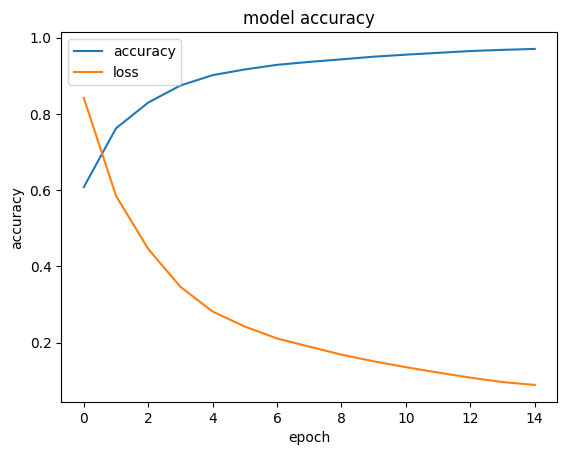

In [60]:
#trining accuracy and loss plot
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
y_pred = model.predict(enocoder_input)
y_pred = np.argmax(y_pred, axis=1)

confusion_matrix(y, y_pred)

859/859 [==============================] - 3s 3ms/step


array([[ 7604,   109,    68],
       [   81, 10855,   181],
       [   66,    71,  8445]], dtype=int64)

<Axes: >

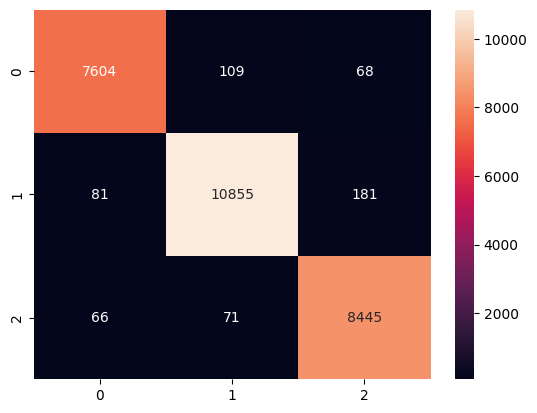

In [62]:
#plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='g')

In [ ]:
#print accuracy, precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7781
           1       0.98      0.98      0.98     11117
           2       0.97      0.98      0.98      8582

    accuracy                           0.98     27480
   macro avg       0.98      0.98      0.98     27480
weighted avg       0.98      0.98      0.98     27480



In [55]:
def SentimentAnalysis(text):
    sentece = [text]
    tokenized_sentence = tokenizer.texts_to_sequences(sentece)
    input_sequence = pad_sequences(tokenized_sentence, maxlen=MAX_LENGTH, padding='pre')
    prediction_ = model.predict(input_sequence)
    print(prediction_)
    prediction = prediction_.argmax()
    print(prediction)
    if prediction == 0:
        print(f"Negative 😠: [confidence - {prediction_[0][0]*100:.2f}%]")
    elif prediction == 1:
        print(f"Neutral 😐: [confidence - {prediction_[0][1]*100:.2f}%]")
    else:
        print(f"Positive 😊: [confidence -  {prediction_[0][2]*100:.2f}%]")
    plot = pd.DataFrame(prediction_, columns=['Negative', 'Neutral', 'Positive'])
    plot.plot(kind='barh')
    


1/1 [==============================] - 0s 336ms/step
[[4.7120480e-03 4.5380477e-04 9.9483407e-01]]
2
Positive 😊: [confidence -  99.48%]


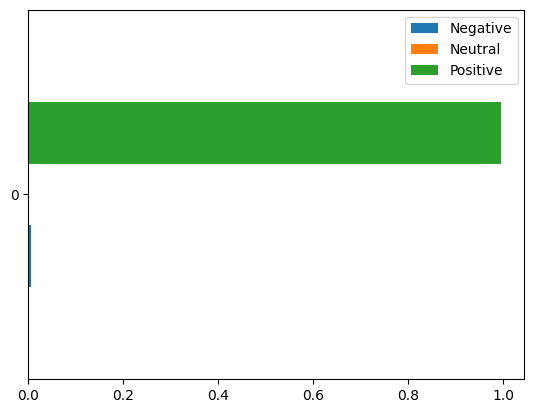

In [56]:
SentimentAnalysis("I am happy")

In [57]:
#save model and tokenizer
model.save('sentiment_model_lstm.h5')
import pickle
with open('tokenizer_lstm.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
#load model and tokenizer
from tensorflow.keras.models import load_model
model1=load_model('sentiment_model_lstm.h5')
import pickle
with open('tokenizer_lstm.pickle', 'rb') as handle:
    tokenizer1 = pickle.load(handle)

1/1 [==============================] - 0s 259ms/step
[[9.993986e-01 1.131149e-04 4.883775e-04]]
0
Negative 😠: [confidence - 99.94%]


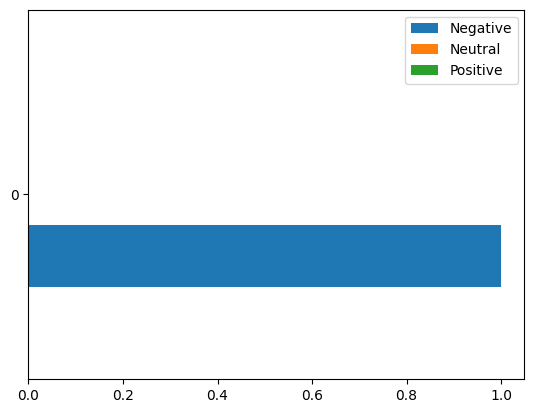

In [59]:
#test loaded model
def SentimentAnalysis1(text):
    sentece = [text]
    tokenized_sentence = tokenizer1.texts_to_sequences(sentece)
    input_sequence = pad_sequences(tokenized_sentence, maxlen=MAX_LENGTH, padding='pre')
    prediction_ = model1.predict(input_sequence)
    print(prediction_)
    prediction = prediction_.argmax()
    print(prediction)
    if prediction == 0:
        print(f"Negative 😠: [confidence - {prediction_[0][0]*100:.2f}%]")
    elif prediction == 1:
        print(f"Neutral 😐: [confidence - {prediction_[0][1]*100:.2f}%]")
    else:
        print(f"Positive 😊: [confidence -  {prediction_[0][2]*100:.2f}%]")
    plot = pd.DataFrame(prediction_, columns=['Negative', 'Neutral', 'Positive'])
    plot.plot(kind='barh')

SentimentAnalysis1("movie alsu worst ga vundi")